# UNIVERSIDADE DE FORTALEZA

## MBA em Ciência de Dados<br>

Prof. PhD Ernerson A. Oliveira <br>
Discente:Sabrina Rodrigues de Sousa <br>
Matrícula:2129475 <br>

# Trabalho de Introdução à Programação com Python

## 1. Introdução

Cada ano que passa, é visto que as redes sociais estão se tornando o principal meio de comunicação entre as pessoas. Com as figuras públicas, como pré-candidatos a presidência, não é diferente. Nesse cenário, é importante compreender as opiniões desses líderes no contexto de ideologias políticas no geral. Para isso, a análise de dados se propõe como uma ferramenta auxiliar para esses estudos.

O estudo teve como objetivo analisar as informações extraidas dos twitters do presidênte Jair Bolsonaro e do ex-presidente Lula , visando estipular se há como definir ideologia política através de publicações no twitter.



## 2. Dados e ferramentas

Os dados usados foram retirados dos twitters oficiais do presidente Jair Bolsonaro e do ex-Presidente Lula. Os arquivos, ques estão no formato Json,contemplam as postagens dentre os anos 2014 á 2020.

Para realizar a análise dos dados serão utilizados os módulos pandas, numpy , matplotlib e re. Além de leitura de arquivos json dos twitetrs.



### 2.1 Sobre os arquivos utilizados

* jair -(jairbolsonaro.json): Dataframe com as postagens o twitter do presidente Jair Bolsonaro, com informações como data e hora da postagem, quantidades de favoritos e retweets, entre outros dados
* lula- (LulaOficial.json): Dataframe com as postagens o twitter do presidente Jair Bolsonaro, com informações como data e hora da postagem, quantidades de favoritos e retweets, entre outros dados.
* stopwords - (Stopwords.txt): arquivo de "palavras vazias", que basicamente são palavras que não dão oppiniões reais do que se quer escrever. ex: a palavra 'para'. Estas palavras são removidas antes ou após o processamento de um texto em linguagem natural.

Os dois arquivos foram disponibilizados pelo Prof. PhD Ernerson A. Oliveira.

## 3 Metodologia de análise

A metodologia utilizada está dividida basicamente em 4 etapas de acordo com os principais processos do trabalho: importação dos dados e módulos; identificação dos dados; tratamento de dados ; análise dos gráficos. O mapa a seguir demonstra os processos realizados.
 

<img src="mapa_processos_vertical.jpg" width=1000, height=800>

Os processos serão detalhados durante a execução do notebook.

## 4 Resultados e Discussões 

### 4.1 Importação de dados e módulos

#### 4.1.1 Importando Módulos

In [1]:
import pandas as pd
import numpy as np
#import nltk
import re
import matplotlib.pyplot as plt

#### 4.1.2 Importando os dados

Os dados em formato de json são importados em data frames

In [2]:
jair=pd.read_json(r'jairbolsonaro.json')
lula=pd.read_json(r'LulaOficial.json')

In [3]:
#Importando stopwords TXT
arq_sw = pd.read_csv(r'stopwords.txt', header = None,names = ['palavra'])
arq_sw

,palavra
0,de
1,a
2,o
3,o
4,que
...,...
425,anteriores
426,federal
427,nova
428,fim


### 4.2 identificação dos dados

Nesta etapa, analisou os dados extraidos da base, quantidade de linha, suas colunas e seu tipo, com o objetivo de definir quais dados seriam explorados no trabalho


#### 4.2.1  Analise  dos arquivos de Jair e Lula

In [4]:
pd.set_option('display.max_columns', None)
jair.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,None,"{'id': 128372940, 'id_str': '128372940', 'name...",NaN,NaN,None,NaN,False,30,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 128372940, 'id_str': '128372940', 'name...",NaN,NaN,None,NaN,False,1773,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2019-07-19 02:04:16+00:00,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 128372940, 'id_str': '128372940', 'name...",NaN,NaN,None,NaN,False,5859,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",0.0,NaN,NaN,NaN,NaN
3,2018-10-09 02:52:56+00:00,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 128372940, 'id_str': '128372940', 'name...",NaN,NaN,None,NaN,False,13915,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",0.0,NaN,NaN,NaN,NaN
4,2017-08-23 15:12:48+00:00,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 128372940, 'id_str': '128372940', 'name...",NaN,NaN,None,NaN,False,2271,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)
lula.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,NaN,None,"{'id': 2670726740, 'id_str': '2670726740', 'na...",NaN,NaN,None,NaN,False,79,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-16 01:53:02+00:00,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,131574396.0,131574396.0,dilmabr,"{'id': 2670726740, 'id_str': '2670726740', 'na...",NaN,NaN,None,NaN,False,17,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-08 23:23:49+00:00,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 2670726740, 'id_str': '2670726740', 'na...",NaN,NaN,None,NaN,False,72,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-18 11:24:23+00:00,920611514071076865,920611514071076864,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,NaN,None,"{'id': 2670726740, 'id_str': '2670726740', 'na...",NaN,NaN,None,NaN,False,63,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-24 22:24:18+00:00,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,NaN,None,"{'id': 2670726740, 'id_str': '2670726740', 'na...",NaN,NaN,None,NaN,False,63,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
jair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6794 entries, 0 to 6793
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 6794 non-null   datetime64[ns, UTC]
 1   id                         6794 non-null   int64              
 2   id_str                     6794 non-null   int64              
 3   full_text                  6794 non-null   object             
 4   truncated                  6794 non-null   bool               
 5   display_text_range         6794 non-null   object             
 6   entities                   6794 non-null   object             
 7   source                     6794 non-null   object             
 8   in_reply_to_status_id      896 non-null    float64            
 9   in_reply_to_status_id_str  896 non-null    float64            
 10  in_reply_to_user_id        938 non-null    float64            
 11  in_r

In [7]:
lula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 14961 non-null  datetime64[ns, UTC]
 1   id                         14961 non-null  int64              
 2   id_str                     14961 non-null  int64              
 3   full_text                  14961 non-null  object             
 4   truncated                  14961 non-null  bool               
 5   display_text_range         14961 non-null  object             
 6   entities                   14961 non-null  object             
 7   source                     14961 non-null  object             
 8   in_reply_to_status_id      321 non-null    float64            
 9   in_reply_to_status_id_str  321 non-null    float64            
 10  in_reply_to_user_id        388 non-null    float64            
 11  in

#### 4.2.2 Definindo dados para estudo

Como é possível ver na tabela acima, há dados sobre data das postagens, números de curtidas, retuites, entre outros. Mas para o objetivo principal do trabalho, optou-se por utilizar os dados das frases e fazer uma exploração a partir delas.

##### 4.2.2.1 Selecionando colunas do dataframe

In [8]:
#Dataframe Jair
Jair_tab = pd.DataFrame()
Jair_tab=jair[['full_text']]

In [9]:
Jair_tab.head()

,full_text
0,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É..."
1,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já..."
2,- Para descontrair. Proibido queimar ovo. (Kkk...
3,Trecho de entrevista ao vivo para o Jornal Nac...
4,Querem criar o fundão bilionário na Reforma Po...


In [10]:
#Dataframe Lula
Lula_tab = pd.DataFrame()
Lula_tab=lula[['full_text']]

In [11]:
Lula_tab.head()

,full_text
0,"""O presidente Lula vai dar um passeio nessa el..."
1,@dilmabr afirma que aqueles que querem acabar ...
2,O PT deu cidadania para as mulheres fazerem po...
3,Continuo sendo o lulinha paz e a amor. A gente...
4,"Olhando as últimas pesquisas, vemos que a únic..."


Para facilitar os processos posteriores, onde será feito uma pesquisa de palavras nas frases, criou-se um arquivo de listas, além de deixa-los com as palavras em minúsculo, para não ter divergência de palavras iguais.

In [12]:
Lst_frases_Jair = Jair_tab['full_text'].str.lower().tolist()
Lst_frases_Lula = Lula_tab['full_text'].str.lower().tolist()

### 4.3 Tratamento e exploração dos dados

#### 4.3.1 Criar slices das palavras Jair e Lula

A partir dos Dataframe das frases foi realizado a divisão das frases em palavras, onde posteriormente será realizado o tratamento delas.

In [13]:
#Slice Jair
lista_Jair = []
for i in range(len(Jair_tab.index)):
    texto = Jair_tab['full_text'][i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Jair.append(palavras[j])

lista_Jair

['EM',
 '"DITADURA"',
 'SEM',
 'PAREDÃO,',
 'ATÉ',
 'CHICO',
 'ALENCAR',
 'É',
 'VALENTÃO.',
 'Mostrem',
 'ao',
 'povo',
 'as',
 'marcas',
 'da',
 'tortura.',
 'Vcs',
 'estão',
 'd',
 'bolso',
 'cheio',
 'do',
 'Bolsa-Ditadura.',
 'Bom',
 'dia!',
 '🇧🇷',
 '#tbt',
 'com',
 'o',
 'amigo',
 '"Canguru",',
 'que',
 'já',
 'deixou',
 'este',
 'plano.',
 'Um',
 'forte',
 'abraço',
 'a',
 'todos!',
 'https://t.co/fNPQUTBnfi',
 '-',
 'Para',
 'descontrair.',
 'Proibido',
 'queimar',
 'ovo.',
 '(Kkkk)',
 'https://t.co/dmqM8DT8Fz',
 'Trecho',
 'de',
 'entrevista',
 'ao',
 'vivo',
 'para',
 'o',
 'Jornal',
 'Nacional',
 '(08/10/2018):',
 'https://t.co/GFRZznKrZS',
 'Querem',
 'criar',
 'o',
 'fundão',
 'bilionário',
 'na',
 'Reforma',
 'Política',
 'mas',
 'alegam',
 'não',
 'ter',
 'dinheiro',
 'para',
 'aplicabilidade',
 'plena',
 'do',
 'voto',
 'impresso!',
 'Contem',
 'outra!',
 'Por',
 '@Rconstantino',
 ':',
 'O',
 'maior',
 'investimento',
 'financeiro',
 'do',
 'governo',
 'Petista',
 'foi'

In [14]:
#cria dataframe, renomeia e transforma palavras em minuscula
df_Jair_palavra = pd.DataFrame([lista_Jair]).T
df_Jair_palavra.rename(columns={0:'palavra'}, inplace = True)
df_Jair_palavra['palavra']=df_Jair_palavra['palavra'].str.lower()
df_Jair_palavra

,palavra
0,em
1,"""ditadura"""
2,sem
3,"paredão,"
4,até
...,...
142132,foto
142133,d
142134,menor
142135,estuprador.


In [15]:
#Slice Lula
lista_Lula = []
for i in range(len(Lula_tab.index)):
    texto = Lula_tab['full_text'][i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Lula.append(palavras[j])

lista_Lula

['"O',
 'presidente',
 'Lula',
 'vai',
 'dar',
 'um',
 'passeio',
 'nessa',
 'eleição.',
 'Ganha',
 'no',
 'primeiro',
 'turno"',
 '-',
 '@Haddad_Fernando,',
 'vice',
 'na',
 'chapa,',
 'em',
 'coletiva',
 'de',
 'imprensa',
 'sobre',
 'a',
 'decisão',
 'da',
 '@ONUBrasil',
 'que',
 'assegura',
 'o',
 'direito',
 'de',
 'Lula',
 'ser',
 'candidato.',
 '@dilmabr',
 'afirma',
 'que',
 'aqueles',
 'que',
 'querem',
 'acabar',
 'com',
 'ministérios,',
 'provavelmente',
 'acabarão',
 'com',
 'o',
 'das',
 'mulheres,',
 'dos',
 'negros',
 'e',
 'dos',
 'direitos',
 'humanos',
 'O',
 'PT',
 'deu',
 'cidadania',
 'para',
 'as',
 'mulheres',
 'fazerem',
 'política,',
 'legalizou',
 'as',
 'domésticas,',
 'aprovou',
 'as',
 'cotas',
 'Continuo',
 'sendo',
 'o',
 'lulinha',
 'paz',
 'e',
 'a',
 'amor.',
 'A',
 'gente',
 'não',
 'pode',
 'deitar',
 'com',
 'raiva',
 'nem',
 'acordar',
 'com',
 'raiva.',
 '#LulanoRadio',
 'Olhando',
 'as',
 'últimas',
 'pesquisas,',
 'vemos',
 'que',
 'a',
 'única'

In [16]:
#cria dataframe, renomeia e transforma palavras em minuscula
df_Jair_palavra = pd.DataFrame([lista_Jair]).T
df_Jair_palavra.rename(columns={0:'palavra'}, inplace = True)
df_Jair_palavra['palavra']=df_Jair_palavra['palavra'].str.lower()
df_Jair_palavra
df_Lula_palavra = pd.DataFrame([lista_Lula]).T
df_Lula_palavra.rename(columns={0:'palavra'}, inplace = True)
df_Lula_palavra['palavra']=df_Lula_palavra['palavra'].str.lower()
df_Lula_palavra

,palavra
0,"""o"
1,presidente
2,lula
3,vai
4,dar
...,...
305651,desemprego
305652,da
305653,sua
305654,história.


#### 4.3.2 Limpeza dos dados

Como twitter é uma rede social, é comum o uso de liguagem informal, como o uso de gírias, além de simbolos, como os emoticons. Além dessas características, na plataforma,  é comum a "marcação" de outros usuários nas postagens por meio de "@", além de meios de engajamento como as hastags. Todas essas informações não auxiliam no objetivo de caracterizar uma ideologia política. Assim, é necessário retirar esses dados do dataframe pra estes não interferirem no resuldado. Outros dados que também podem ser dispensados, são as palavras de ligação, ou que não tenham sentido no objetivo final do trabalho. 

Essa limpeza dos dados foi realizada em três etapas. Primeiro retirou-se os emojis e simbolos, através de uma função. Também com uma função, o segundo processo foi a retirada de marcações e hastags. 

Já no terceiro processo, onde retira-se as stopwords, foi utilizado um arquivo txt, que continha uma lista de palavras desnecessárias. A partir da função Merge, foi feito um outer join dos dados dos twitters , para que o resultado gerasse somente as palavras que não estavam dentro da lista de stopwords.

##### 4.3.2.1 Retirar emojis e simbolos

In [17]:
def remover_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [18]:
df_Jair_palavra['palavra'] = df_Jair_palavra['palavra'].apply(remover_emoji)
df_Jair_palavra

,palavra
0,em
1,"""ditadura"""
2,sem
3,"paredão,"
4,até
...,...
142132,foto
142133,d
142134,menor
142135,estuprador.


In [19]:
df_Lula_palavra['palavra'] =df_Lula_palavra['palavra'].apply(remover_emoji)
df_Lula_palavra.head()

,palavra
0,"""o"
1,presidente
2,lula
3,vai
4,dar


##### 4.3.2.2 Retirar menções e hastags

Na função de retiradas de menções, basicamente é feito uma substituição dos caracteres informados por caractere de espaço. Depois desse processo, basta retirar as celulas que ficaram vazias, como também limpar os espaços vazios de algumas palavras.

In [20]:
def remover_mentions(x):
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    x = re.sub(r'@\S+', ' ', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\w*\d+\w*', ' ', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub('[,.%!?:;]',' ',x)
    x = re.sub('\'|\"|\_|\-|\(|\)|\[|\]|\*|\$|\+|\r|\/|\n',' ',x)
    x = re.sub(r'\s+','',x)
    return x


In [21]:
df_Jair_palavra['palavra'] = df_Jair_palavra['palavra'].apply(remover_mentions)
df_Jair_palavra

,palavra
0,em
1,ditadura
2,sem
3,paredão
4,até
...,...
142132,foto
142133,d
142134,menor
142135,estuprador


In [22]:
df_Lula_palavra['palavra'] =df_Lula_palavra['palavra'].apply(remover_mentions)
df_Lula_palavra.head()

,palavra
0,o
1,presidente
2,lula
3,vai
4,dar


In [23]:
#Tornando os caracteres vazios em tipos 'nan'
df_Jair_palavra['palavra'].replace(' ',np.nan, inplace=True)
df_Jair_palavra['palavra'].replace('',np.nan, inplace=True)
df_Jair_palavra

,palavra
0,em
1,ditadura
2,sem
3,paredão
4,até
...,...
142132,foto
142133,d
142134,menor
142135,estuprador


In [24]:
# agora descarta-se valores nulos
df_Jair_palavra.dropna(subset=['palavra'], inplace=True)
df_Jair_palavra

,palavra
0,em
1,ditadura
2,sem
3,paredão
4,até
...,...
142131,divulgar
142132,foto
142133,d
142134,menor


In [25]:
df_Lula_palavra['palavra'].replace(' ',np.nan, inplace=True)
df_Lula_palavra['palavra'].replace('',np.nan, inplace=True)
df_Lula_palavra
df_Lula_palavra.dropna(subset=['palavra'], inplace=True)
df_Lula_palavra

,palavra
0,o
1,presidente
2,lula
3,vai
4,dar
...,...
305650,de
305651,desemprego
305652,da
305653,sua


##### 4.3.2.3 Retirar palavras desnecessárias (Stopwords)

In [26]:
jair_word_c=pd.merge(df_Jair_palavra,arq_sw, on=['palavra'], how="outer", indicator=True)
jair_word_c = jair_word_c[jair_word_c['_merge']=='left_only']
jair_word_c = jair_word_c[['palavra']]
jair_word_c

,palavra
1815,ditadura
1816,ditadura
1817,ditadura
1818,ditadura
1819,ditadura
...,...
129313,noturnas
129314,destaquei
129315,vigor
129316,alterálo


In [27]:
lula_word_c=pd.merge(df_Lula_palavra,arq_sw, on=['palavra'], how="outer", indicator=True)
lula_word_c = lula_word_c[lula_word_c['_merge']=='left_only']
lula_word_c = lula_word_c[['palavra']]
lula_word_c

,palavra
19227,passeio
19270,eleição
19271,eleição
19272,eleição
19273,eleição
...,...
284846,atendíamos
284847,ptodos
284848,simeu
284849,paes


#### 4.3.3 Criar uma tabela de dados gerais

In [28]:
#Concatenar palavras do DF de Lula e Jair
palavras_geral = pd.concat([lula_word_c, jair_word_c])
palavras_geral

,palavra
19227,passeio
19270,eleição
19271,eleição
19272,eleição
19273,eleição
...,...
129313,noturnas
129314,destaquei
129315,vigor
129316,alterálo


In [29]:
lista_palavras_geral = palavras_geral['palavra'].tolist()
lista_palavras_geral

['passeio',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'eleição',
 'el

In [30]:
total_geral = dict()
for palavra in lista_palavras_geral:
    if palavra in total_geral:
        total_geral[palavra] = total_geral[palavra] + 1
    else:
            total_geral[palavra] = 1

total_geral = pd.DataFrame(total_geral.items(),columns=['palavra','quantidade'])

#total_geral.drop([],inplace=True)
#top 10 palavras temas
top_10_palavras=total_geral.sort_values(['quantidade'],ascending=False).head(10)
top_10_palavras   

,palavra,quantidade
323,governo,1037
217,educação,517
22,política,493
253,estado,438
115,democracia,435
192,entrevista,430
1834,abraço,406
537,milhões,402
158,vida,401
815,nacional,387


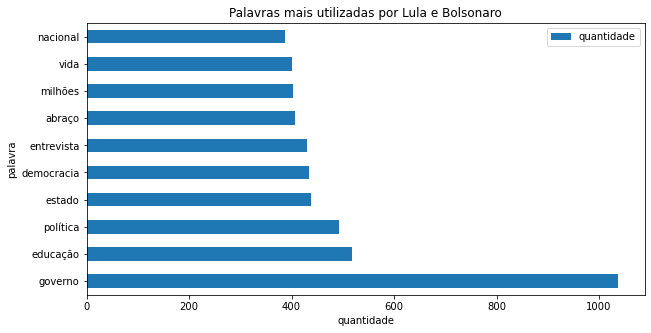

In [31]:
palavras = top_10_palavras.plot(x='palavra',y = 'quantidade',kind = "barh",figsize=(10,5))
figsize=(10,5)
plt.ylabel('palavra')
plt.xlabel('quantidade')
plt.title('Palavras mais utilizadas por Lula e Bolsonaro')
plt.show()

Analisando o gráfico nota-se uma maior incidência de palavras que permeiam os debates políticos como temas. As palavras como governo, educação e política tiveram grandes incidências.
Para fins de estudos, vamos utilizar as duas palavras mais utilizadas e trata-las como temas políticos. Partindo desse presuposto, vamos avaliar quais palavras são mais compartilhadas por eles a partir do tema.

### 4.4 Analisar palavras-tema


Após a definição das três palavras tema, realizou-se a busca por frases que continham essas palavras, a fim de verificar quais assuntos são regidos em torno de cada tema.

#### 4.4.1 Análise da palavra- tema: Governo

In [32]:
frases_principais_lula = []
#Busca = 'governo'
for linha in Lst_frases_Lula:
    if 'governo' in linha:
        frases_principais_lula.append(linha)
frases_principais_lula

['"este governo está levando o país ao passado"',
 '"quando estávamos no governo, errava porque apostava na desgraça. hoje faz malabarismos pra tentar pintar uma economia melhor do que o real"',
 '"nunca se investiu tanto em educação nesse país como no meu governo e no da @dilmabr", lula #lulaporsp #retafinalcomdilma',
 'no nosso governo, formalizamos 6 milhões de micro e pequenos empreendedores e o salário mínimo aumentou. #lulanorio',
 'criado em 1996, o pronaf é um programa de crédito voltado para o pequeno agricultor que foi expandido e fortalecido com o governo lula, chegando a 12 linhas de crédito, como o pronaf semiárido e o pronaf mais alimentos. #lulapresidente https://t.co/mkq9mceaky',
 '"quando alguém que não é da elite chega ao governo, é trucidado pela imprensa. eu fui, o getúlio foi, o juscelino foi", lula #lulaporsp',
 'o instituto lula já reuniu mais de 300 livros e 3000 teses sobre o presidente e seus governos. a biblioteca lula pretende resgatar o legado do ex-preside

Após a extração das frases do tema, é feito o tratamento delas da mesma forma que foi feito anteriormente.

In [33]:
lista_Lula_tema = []
for i in range(len(frases_principais_lula)):
    texto = frases_principais_lula [i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Lula_tema.append(palavras[j])

lista_Lula_tema

['"este',
 'governo',
 'está',
 'levando',
 'o',
 'país',
 'ao',
 'passado"',
 '"quando',
 'estávamos',
 'no',
 'governo,',
 'errava',
 'porque',
 'apostava',
 'na',
 'desgraça.',
 'hoje',
 'faz',
 'malabarismos',
 'pra',
 'tentar',
 'pintar',
 'uma',
 'economia',
 'melhor',
 'do',
 'que',
 'o',
 'real"',
 '"nunca',
 'se',
 'investiu',
 'tanto',
 'em',
 'educação',
 'nesse',
 'país',
 'como',
 'no',
 'meu',
 'governo',
 'e',
 'no',
 'da',
 '@dilmabr",',
 'lula',
 '#lulaporsp',
 '#retafinalcomdilma',
 'no',
 'nosso',
 'governo,',
 'formalizamos',
 '6',
 'milhões',
 'de',
 'micro',
 'e',
 'pequenos',
 'empreendedores',
 'e',
 'o',
 'salário',
 'mínimo',
 'aumentou.',
 '#lulanorio',
 'criado',
 'em',
 '1996,',
 'o',
 'pronaf',
 'é',
 'um',
 'programa',
 'de',
 'crédito',
 'voltado',
 'para',
 'o',
 'pequeno',
 'agricultor',
 'que',
 'foi',
 'expandido',
 'e',
 'fortalecido',
 'com',
 'o',
 'governo',
 'lula,',
 'chegando',
 'a',
 '12',
 'linhas',
 'de',
 'crédito,',
 'como',
 'o',
 'prona

In [34]:
df_Lula_tema = pd.DataFrame([lista_Lula_tema]).T
df_Lula_tema.rename(columns={0:'palavra'}, inplace = True)
df_Lula_tema['palavra']=df_Lula_tema['palavra'].str.lower()
df_Lula_tema
df_Lula_tema['palavra'] = df_Lula_tema['palavra'].apply(remover_emoji)
df_Lula_tema['palavra'] = df_Lula_tema['palavra'].apply(remover_mentions)
df_Lula_tema = df_Lula_tema.replace("governo", "")
df_Lula_tema['palavra'].replace(' ',np.nan, inplace=True)
df_Lula_tema['palavra'].replace('',np.nan, inplace=True)
df_Lula_tema.dropna(subset=['palavra'], inplace=True)


In [35]:
lula_governo = pd.merge(df_Lula_tema,arq_sw, on=['palavra'], how="outer", indicator=True)
lula_governo = lula_governo[lula_governo['_merge']=='left_only']
lula_governo = lula_governo[['palavra']]
lula_governo

,palavra
1117,passado
1118,passado
1374,errava
1414,apostava
1512,desgraça
...,...
17368,regime
17369,urgência
17370,debate
17371,pressa


In [36]:
lista_lula_governo = lula_governo['palavra'].tolist()
lula_governo = dict()
for palavra in lista_lula_governo:
    if palavra in lula_governo:
        lula_governo[palavra] = lula_governo[palavra] + 1
    else:
            lula_governo[palavra] = 1

lula_governo = pd.DataFrame(lula_governo.items(),columns=['palavra','quantidade'])
#retirando a palavra governo
#lula_governo.drop([331],inplace=True)
#top 10 palavras temas
top_10_lula_governo=lula_governo.sort_values(['quantidade'],ascending=False).head(10)
top_10_lula_governo  

,palavra,quantidade
170,plano,42
12,educação,41
328,estado,37
78,pobre,35
15,milhões,32
86,precisa,25
172,emprego,24
99,pobres,24
247,trabalhadores,22
8,economia,21


In [37]:
frases_principais_jair = []
#Busca = 'governo'
for linha in Lst_frases_Jair:
    if 'governo' in linha:
        frases_principais_jair.append(linha)
frases_principais_jair
lista_Jair_tema = []
for i in range(len(frases_principais_jair)):
    texto = frases_principais_jair [i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Jair_tema.append(palavras[j])

df_Jair_tema = pd.DataFrame([lista_Jair_tema]).T
df_Jair_tema.rename(columns={0:'palavra'}, inplace = True)
df_Jair_tema['palavra']=df_Jair_tema['palavra'].str.lower()
df_Jair_tema
df_Jair_tema['palavra'] = df_Jair_tema['palavra'].apply(remover_emoji)
df_Jair_tema['palavra'] = df_Jair_tema['palavra'].apply(remover_mentions)

df_Jair_tema = df_Jair_tema.replace("governo", "")
df_Jair_tema = df_Jair_tema.replace(" ", "")
df_Jair_tema
df_Jair_tema['palavra'].replace(' ',np.nan, inplace=True)
df_Jair_tema['palavra'].replace('',np.nan, inplace=True)
df_Jair_tema.dropna(subset=['palavra'], inplace=True)

jair_governo = pd.merge(df_Jair_tema,arq_sw, on=['palavra'], how="outer", indicator=True)
jair_governo = jair_governo[jair_governo['_merge']=='left_only']
jair_governo = jair_governo[['palavra']]
jair_governo

,palavra
552,investimento
553,investimento
554,investimento
555,investimento
556,investimento
...,...
13370,araguaia
13371,destaques
13372,cerimônia
13373,destaquei


In [38]:
lista_jair_governo = jair_governo['palavra'].tolist()
jair_governo = dict()
for palavra in lista_jair_governo:
    if palavra in jair_governo:
        jair_governo[palavra] = jair_governo[palavra] + 1
    else:
            jair_governo[palavra] = 1

jair_governo = pd.DataFrame(jair_governo.items(),columns=['palavra','quantidade'])
#top 10 palavras temas
top_10_jair_governo=jair_governo.sort_values(['quantidade'],ascending=False).head(10)
top_10_jair_governo

,palavra,quantidade
54,economia,24
345,trabalho,24
74,estado,22
85,população,21
87,corrupção,20
291,início,19
795,segurança,18
22,milhões,18
17,recursos,17
537,ações,17


In [39]:
df = pd.merge(top_10_jair_governo, top_10_lula_governo , on='palavra', how='outer')
df.rename(columns={'quantidade_x': 'Jair'}, inplace = True) 
df.rename(columns={'quantidade_y': 'Lula'}, inplace = True) 
df

,palavra,Jair,Lula
0,economia,24.0,21.0
1,trabalho,24.0,NaN
2,estado,22.0,37.0
3,população,21.0,NaN
4,corrupção,20.0,NaN
5,início,19.0,NaN
6,segurança,18.0,NaN
7,milhões,18.0,32.0
8,recursos,17.0,NaN
9,ações,17.0,NaN


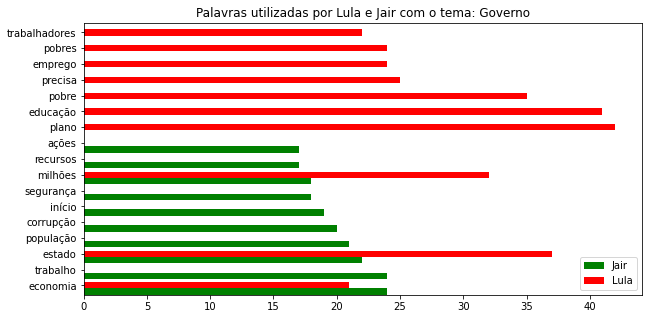

In [40]:
ind = np.arange(len(df))
width = 0.4
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(ind,df.Jair,width,color ='green',label ='Jair')
ax.barh(ind + width,df.Lula,width,color ='red',label ='Lula')
ax.set_title('Palavras utilizadas por Lula e Jair com o tema: Governo')    
ax.set(yticks=ind +width, yticklabels=df.palavra, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

Com o tema Governo, pode-se observar que há somente uma palavra (estado) com grande incidência nos dois candidatos. As palavras mais utilizadas por Lula varia entre educação, pobre e emprego. Já Jair Bolsonaro comenta mais sobre economia, trabalho e corrupção.

#### 4.4.1 Análise da palavra- tema: Educação

In [41]:
frases_principais_lula = []
#Busca = 'educação'
for linha in Lst_frases_Lula:
    if 'educação' in linha:
        frases_principais_lula.append(linha)
frases_principais_lula
lista_Lula_tema = []
for i in range(len(frases_principais_lula)):
    texto = frases_principais_lula [i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Lula_tema.append(palavras[j])

df_Lula_tema = pd.DataFrame([lista_Lula_tema]).T
df_Lula_tema.rename(columns={0:'palavra'}, inplace = True)
df_Lula_tema['palavra']=df_Lula_tema['palavra'].str.lower()
df_Lula_tema
df_Lula_tema['palavra'] = df_Lula_tema['palavra'].apply(remover_emoji)
df_Lula_tema['palavra'] = df_Lula_tema['palavra'].apply(remover_mentions)
df_Lula_tema = df_Lula_tema.replace("educação", "")
df_Lula_tema = df_Lula_tema.replace(" ", "")
df_Lula_tema
df_Lula_tema['palavra'].replace(' ',np.nan, inplace=True)
df_Lula_tema['palavra'].replace('',np.nan, inplace=True)
df_Lula_tema.dropna(subset=['palavra'], inplace=True)

lula_educacao = pd.merge(df_Lula_tema,arq_sw, on=['palavra'], how="outer", indicator=True)
lula_educacao = lula_educacao[lula_educacao['_merge']=='left_only']
lula_educacao = lula_educacao[['palavra']]
lula_educacao

,palavra
348,sonhava
471,royalties
472,royalties
473,royalties
474,royalties
...,...
7773,produzirem
7774,conhecimento”
7775,ficam
7776,armas


In [42]:
lista_lula_educacao = lula_educacao['palavra'].tolist()
lula_educacao = dict()
for palavra in lista_lula_educacao:
    if palavra in lula_educacao:
        lula_educacao[palavra] = lula_educacao[palavra] + 1
    else:
            lula_educacao[palavra] = 1

lula_educacao = pd.DataFrame(lula_educacao.items(),columns=['palavra','quantidade'])

#top 10 palavras temas
top_10_lula_educacao=lula_educacao.sort_values(['quantidade'],ascending=False).head(10)
top_10_lula_educacao

,palavra,quantidade
21,investimento,57
107,gasto,36
206,saúde,36
106,investir,30
18,governo,26
176,emprego,23
295,elite,21
12,trabalho,21
291,futuro,20
101,universidade,20


In [43]:
frases_principais_jair = []
#Busca = 'educação'
for linha in Lst_frases_Jair:
    if 'educação' in linha:
        frases_principais_jair.append(linha)
frases_principais_jair
lista_Jair_tema = []
for i in range(len(frases_principais_jair)):
    texto = frases_principais_jair [i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Jair_tema.append(palavras[j])

df_Jair_tema = pd.DataFrame([lista_Jair_tema]).T
df_Jair_tema.rename(columns={0:'palavra'}, inplace = True)
df_Jair_tema['palavra']=df_Jair_tema['palavra'].str.lower()
df_Jair_tema
df_Jair_tema['palavra'] = df_Jair_tema['palavra'].apply(remover_emoji)
df_Jair_tema['palavra'] = df_Jair_tema['palavra'].apply(remover_mentions)
df_Jair_tema = df_Jair_tema.replace("educação", "")
df_Jair_tema = df_Jair_tema.replace(" ", "")
df_Jair_tema
df_Jair_tema['palavra'].replace(' ',np.nan, inplace=True)
df_Jair_tema['palavra'].replace('',np.nan, inplace=True)
df_Jair_tema.dropna(subset=['palavra'], inplace=True)

jair_educacao = pd.merge(df_Jair_tema,arq_sw, on=['palavra'], how="outer", indicator=True)
jair_educacao = jair_educacao[jair_educacao['_merge']=='left_only']
jair_educacao = jair_educacao[['palavra']]
jair_educacao

,palavra
0,novos
1,fatos
2,fatos
3,fatos
4,fatos
...,...
2879,pudemos
2880,falar
2881,andamento
2882,pilares


In [44]:
lista_jair_educacao = jair_educacao['palavra'].tolist()
jair_educacao = dict()
for palavra in lista_jair_educacao:
    if palavra in jair_educacao:
        jair_educacao[palavra] = jair_educacao[palavra] + 1
    else:
            jair_educacao[palavra] = 1

jair_educacao = pd.DataFrame(jair_educacao.items(),columns=['palavra','quantidade'])
#top 10 palavras temas
top_10_jair_educacao=jair_educacao.sort_values(['quantidade'],ascending=False).head(10)
top_10_jair_educacao

,palavra,quantidade
24,escolas,16
100,ministro,15
135,programa,14
6,ministério,12
13,ensino,10
37,saúde,10
28,escola,9
369,alunos,8
53,públicas,8
26,professor,8


In [45]:
df2 = pd.merge(top_10_jair_educacao, top_10_lula_educacao , on='palavra', how='outer')
df2.rename(columns={'quantidade_x': 'Jair'}, inplace = True) 
df2.rename(columns={'quantidade_y': 'Lula'}, inplace = True) 
df2

,palavra,Jair,Lula
0,escolas,16.0,NaN
1,ministro,15.0,NaN
2,programa,14.0,NaN
3,ministério,12.0,NaN
4,ensino,10.0,NaN
5,saúde,10.0,36.0
6,escola,9.0,NaN
7,alunos,8.0,NaN
8,públicas,8.0,NaN
9,professor,8.0,NaN


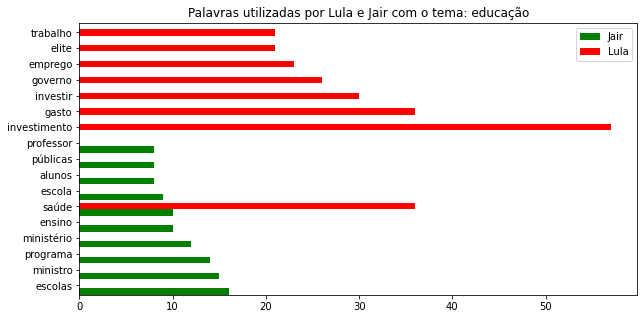

In [46]:
ind = np.arange(len(df2))
width = 0.4
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(ind,df2.Jair,width,color ='green',label ='Jair')
ax.barh(ind + width,df2.Lula,width,color ='red',label ='Lula')
ax.set_title('Palavras utilizadas por Lula e Jair com o tema: educação')    
ax.set(yticks=ind +width, yticklabels=df2.palavra, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

O tema 

#### 4.4.1 Análise da palavra- tema: Política

In [47]:
frases_principais_lula = []
#Busca = 'política'
for linha in Lst_frases_Lula:
    if 'política' in linha:
        frases_principais_lula.append(linha)
frases_principais_lula
lista_Lula_tema = []
for i in range(len(frases_principais_lula)):
    texto = frases_principais_lula [i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Lula_tema.append(palavras[j])

df_Lula_tema = pd.DataFrame([lista_Lula_tema]).T
df_Lula_tema.rename(columns={0:'palavra'}, inplace = True)
df_Lula_tema['palavra']=df_Lula_tema['palavra'].str.lower()
df_Lula_tema
df_Lula_tema['palavra'] = df_Lula_tema['palavra'].apply(remover_emoji)
df_Lula_tema['palavra'] = df_Lula_tema['palavra'].apply(remover_mentions)
df_Lula_tema = df_Lula_tema.replace("política", "")
df_Lula_tema = df_Lula_tema.replace(" ", "")
df_Lula_tema
df_Lula_tema['palavra'].replace(' ',np.nan, inplace=True)
df_Lula_tema['palavra'].replace('',np.nan, inplace=True)
df_Lula_tema.dropna(subset=['palavra'], inplace=True)

lula_politico = pd.merge(df_Lula_tema,arq_sw, on=['palavra'], how="outer", indicator=True)
lula_politico = lula_politico[lula_politico['_merge']=='left_only']
lula_politico = lula_politico[['palavra']]
lula_politico

,palavra
387,cidadania
388,cidadania
582,mulheres
583,mulheres
584,mulheres
...,...
10902,afastamos
10903,diferenças
10905,amizades
10906,amor


In [48]:
lista_lula_politico = lula_politico['palavra'].tolist()
lula_politico = dict()
for palavra in lista_lula_politico:
    if palavra in lula_politico:
        lula_politico[palavra] = lula_politico[palavra] + 1
    else:
            lula_politico[palavra] = 1

lula_politico = pd.DataFrame(lula_politico.items(),columns=['palavra','quantidade'])
#retirando a palavra politico
#top 10 palavras temas
top_10_lula_politico=lula_politico.sort_values(['quantidade'],ascending=False).head(10)
top_10_lula_politico

,palavra,quantidade
124,políticas,76
48,prisão,57
217,públicas,25
324,governo,22
115,vida,19
19,consciência,18
97,nova,17
120,américa,17
417,democracia,16
193,nacional,16


In [49]:
frases_principais_jair = []
#Busca = 'política'
for linha in Lst_frases_Jair:
    if 'política' in linha:
        frases_principais_jair.append(linha)
frases_principais_jair
lista_Jair_tema = []
for i in range(len(frases_principais_jair)):
    texto = frases_principais_jair [i]
    palavras = texto.split(' ')
    for j in range(len(palavras)):
        lista_Jair_tema.append(palavras[j])

df_Jair_tema = pd.DataFrame([lista_Jair_tema]).T
df_Jair_tema.rename(columns={0:'palavra'}, inplace = True)
df_Jair_tema['palavra']=df_Jair_tema['palavra'].str.lower()
df_Jair_tema
df_Jair_tema['palavra'] = df_Jair_tema['palavra'].apply(remover_emoji)
df_Jair_tema['palavra'] = df_Jair_tema['palavra'].apply(remover_mentions)
df_Jair_tema = df_Jair_tema.replace("política", "")
df_Jair_tema = df_Jair_tema.replace(" ", "")
df_Jair_tema
df_Jair_tema['palavra'].replace(' ',np.nan, inplace=True)
df_Jair_tema['palavra'].replace('',np.nan, inplace=True)
df_Jair_tema.dropna(subset=['palavra'], inplace=True)

jair_politico = pd.merge(df_Jair_tema,arq_sw, on=['palavra'], how="outer", indicator=True)
jair_politico = jair_politico[jair_politico['_merge']=='left_only']
jair_politico = jair_politico[['palavra']]
jair_politico

,palavra
1,criar
92,fundão
93,bilionário
122,reforma
123,reforma
...,...
2864,privilegiar
2865,alimento
2866,produzido
2867,familiar


In [50]:
lista_jair_politico = jair_politico['palavra'].tolist()
jair_politico = dict()
for palavra in lista_jair_politico:
    if palavra in jair_politico:
        jair_politico[palavra] = jair_politico[palavra] + 1
    else:
            jair_politico[palavra] = 1

jair_politico = pd.DataFrame(jair_politico.items(),columns=['palavra','quantidade'])
#retirando a palavra politico
#top 10 palavras temas
top_10_jair_politico=jair_politico.sort_values(['quantidade'],ascending=False).head(10)
top_10_jair_politico

,palavra,quantidade
110,políticas,20
303,nacional,12
70,corrupção,10
109,indicações,10
115,apoio,8
100,governo,7
15,brasileira,6
41,nova,6
632,crime,5
195,segurança,5


In [51]:
df3 = pd.merge(top_10_jair_politico , top_10_lula_politico , on='palavra', how='outer')
df3.rename(columns={'quantidade_x': 'Jair'}, inplace = True) 
df3.rename(columns={'quantidade_y': 'Lula'}, inplace = True) 
df3

,palavra,Jair,Lula
0,políticas,20.0,76.0
1,nacional,12.0,16.0
2,corrupção,10.0,NaN
3,indicações,10.0,NaN
4,apoio,8.0,NaN
5,governo,7.0,22.0
6,brasileira,6.0,NaN
7,nova,6.0,17.0
8,crime,5.0,NaN
9,segurança,5.0,NaN


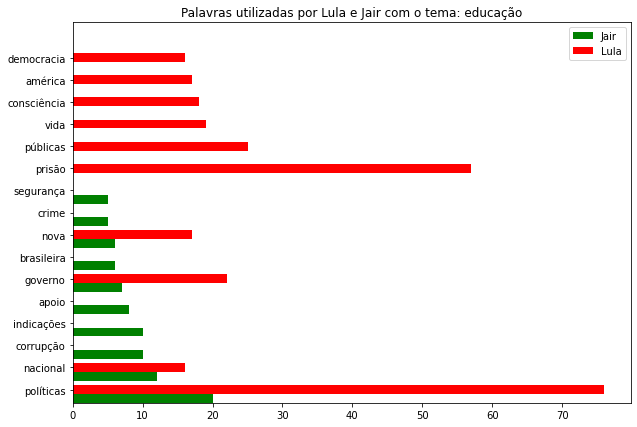

In [52]:
ind = np.arange(len(df3))
width = 0.4
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(ind,df3.Jair,width,color ='green',label ='Jair')
ax.barh(ind + width,df3.Lula,width,color ='red',label ='Lula')
ax.set_title('Palavras utilizadas por Lula e Jair com o tema: educação')    
ax.set(yticks=ind +width, yticklabels=df3.palavra, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

## 5 Conclusão

O ex- presidente Lula é aquele que mais utiliza-se do twitter para disseminar suas opiniões.  Destaca-se a divergência das principais palavras utilizadas por cada candidato, embasando ainda mais o conceito de posicionamentos opostos deles. Enquanto lula publica palavras com tons mais sobre educação e emprego , Jair Bolsonaro compartilha sobre economia e corrupção.
De modo geral,os dados disponibilizados forneceram informações contudentes para serem explorados. Com essa base, pode-se concluir que se pode ter uma noção básica da ideologia política a partir dos twitters.
A partir desses dados e do presente trabalho, foi possível observar que mesmo com a aplicação de conceitos básicos de Python para tratamento e análise exploratória de dados é possivel retirar inúmeras informações e aprendizados, tanto nos resultados deste, como também em sua concepção.

#### Referências

In [53]:
#https://www.datacamp.com/community/tutorials/case-conversion-python (merge)
#https://ichi.pro/pt/limpeza-de-dados-de-texto-com-python-200778039524214 (metions)
#https://stackoverflow.com/questions/15201386/how-to-plot-multiple-horizontal-bars-in-one-chart-with-matplotlib(gráficos)
#https://blog.betrybe.com/python/python-split/(split)